# Fashion MNIST PROJECT

In [1]:
import tensorflow as tf

C:\Users\91774\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91774\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91774\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91774\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'1.13.1'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

<img src="pictures/Fashion MNIST.png">

## Creating the Model Using the Sequential API :

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]), #flatten layer covert input image into a 1D array
    keras.layers.Dense(300, activation = "relu"), #adding dense hidden layer with 300 neurons
    keras.layers.Dense(100, activation = "relu"), #adding second dense hidden layer with 100 neurons
    keras.layers.Dense(10, activation = "softmax"), #adding third hidden layer with 50 neurons and softmax A.F.
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

## Compiling the Model

In [13]:
model.compile(loss = "sparse_categorical_crossentropy", #we use this loss because we have sparse labels
              optimizer = "sgd", #we will train the model using simple stochastic gradient descent #sgd
              metrics = ["accuracy"])
              
              

In [14]:
history = model.fit(X_train, y_train, epochs = 11,
                    validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/11
55000/55000 [==============================] - 7s 134us/sample - loss: 0.7078 - acc: 0.7664 - val_loss: 0.5096 - val_acc: 0.8306
Epoch 2/11
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4846 - acc: 0.8325 - val_loss: 0.4400 - val_acc: 0.8554
Epoch 3/11
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4403 - acc: 0.8461 - val_loss: 0.4056 - val_acc: 0.8626
Epoch 4/11
55000/55000 [==============================] - 7s 128us/sample - loss: 0.4136 - acc: 0.8550 - val_loss: 0.3982 - val_acc: 0.8644
Epoch 5/11
55000/55000 [==============================] - 7s 130us/sample - loss: 0.3938 - acc: 0.8619 - val_loss: 0.3919 - val_acc: 0.8654
Epoch 6/11
55000/55000 [==============================] - 7s 128us/sample - loss: 0.3779 - acc: 0.8668 - val_loss: 0.3823 - val_acc: 0.8698
Epoch 7/11
55000/55000 [==============================] - 7s 128us/sample - loss: 0.3644 - acc: 0.8714 - val_lo

- Now the Neural Network is trained. At each epoch during training, Keras displays the number of instances processed so far,
  the mean training time per sample, the loss and accuracy.
- we can see that the training loss went down, which is good sign.
- And the validation accuracy reached 88.8 % after 30 epochs, not to far from the training accuracy,
- so there does not seem to be much overfitting going on.

In [15]:
history.history

{'loss': [0.7077780692534014,
  0.48458422400301154,
  0.4402588974692605,
  0.41364764771894974,
  0.3938376271421259,
  0.3779233512098139,
  0.3643524460965937,
  0.35358024206811733,
  0.3427207849535075,
  0.33372865381240846,
  0.32526263332366945],
 'acc': [0.7663636,
  0.8325091,
  0.84614545,
  0.855,
  0.8619091,
  0.8668182,
  0.87143636,
  0.8756545,
  0.87758183,
  0.88003635,
  0.8828545],
 'val_loss': [0.5095683901786804,
  0.4400189088821411,
  0.4055695719718933,
  0.39817383823394775,
  0.3918601125717163,
  0.3823103147983551,
  0.3757166596412659,
  0.35346419994831085,
  0.3588083386719227,
  0.3396064751625061,
  0.33797177399396894],
 'val_acc': [0.8306,
  0.8554,
  0.8626,
  0.8644,
  0.8654,
  0.8698,
  0.8694,
  0.8778,
  0.8722,
  0.8804,
  0.8816]}

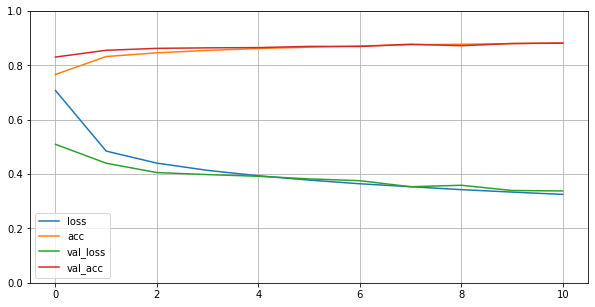

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0-1]
plt.show()

In [17]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 3.0028 - acc: 0.8108


[3.002827328681946, 0.8108]

## Using the Model To make Prediction

In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [20]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

<img src="pictures/Fashion MNIST.png">